In [1]:
#pip install missingno
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/PHA/PHA_data.csv")
#df

C:\Users\jornk\AppData\Local\Temp\ipykernel_15820\1696205521.py:1: DtypeWarning: Columns (2,3,5,6,7,8,9,10,22,29,30,42,43,58,59,62,63,64,65,66,67,68,69,70,72,74,76,80,81,103,105,110,111,112) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Datasets/PHA/PHA_data.csv")


In [3]:
# Cargamos leyenda y eliminamos campos erroneos
info_path = 'Datasets/PHA/info/Afilelayout.txt'
# Convertimos la descripción de las columnas en un diccionario para que el acceso sea sencillo y rápido
dic_legend = {}

with open(info_path) as file:
    reader = csv.reader(file)
    next(reader) # Descartamos cabecera
    for row in reader:
        dic_legend[row[0]] = row[1:5]


del dic_legend['<<<<<<< HEAD']
del dic_legend['=======']
del dic_legend['end_of_record']
del dic_legend['>>>>>>> wip/victor']
#print(dic_legend)
#print('[+] Numero de registros: ', len(dic_legend))

In [4]:
# contamos valores faltantes y representamos

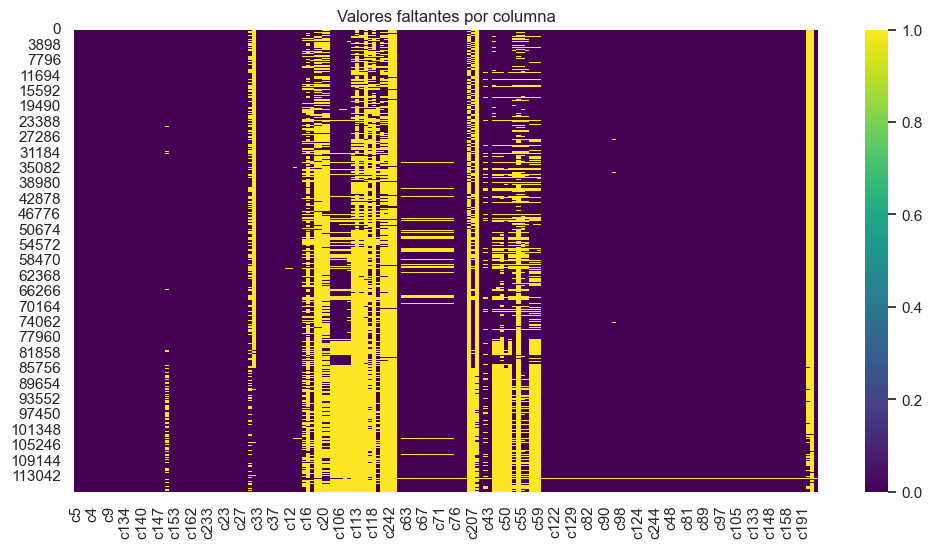

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# leer el dataframe


# crear el mapa de calor
sns.set(style='white')
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Valores faltantes por columna')
plt.show()

In [6]:
# mostrar equivalencia entre descripción y nombre columna
for nombre in dic_legend:
    des = dic_legend.get(nombre)[2]
    print("{} tiene como descripción {} ".format(nombre, des))

c5 tiene como descripción Unique control number used to relate to AID_MAIN table. 
c1 tiene como descripción Type of Event 
c2 tiene como descripción FAR part number 
c3 tiene como descripción Form on which the latest data was received. 
c4 tiene como descripción Agency conducting investigation. 
c6 tiene como descripción Year the accident/incident happened. 
c7 tiene como descripción Month the accident/incident happened. 
c8 tiene como descripción Day the accident/incident happened. 
c9 tiene como descripción Date the accident/incident happened. 
c10 tiene como descripción Local time of the accident/incident. 
c75 tiene como descripción First second or third airplane involved or Not a midair. 
c132 tiene como descripción First remedial action area code 
c134 tiene como descripción First remedial action taken code 
c136 tiene como descripción Second remedial action area code 
c138 tiene como descripción Second remedial action taken code 
c139 tiene como descripción Code for related rep

In [7]:
# primera eliminación de columnas con muchos datos faltantes
df = df.dropna(thresh=100000, axis=1)
df = df.drop(labels='end_of_record', axis=1)
df = df.drop(labels='c5', axis=1)
df = df.drop(labels='c6', axis=1)
df = df.drop(labels='c7', axis=1)
df = df.drop(labels='c8', axis=1)

#borramos filas con más de 3 datos faltantes
df = df.dropna(thresh=3)

In [8]:
# Alternativa menos visual para conteo de valores faltantes
#Pasamos caracteres raros a nan para poder identificarlos
#df[df == '?'] = np.nan

miss_values_count = df.isnull().sum(min_count=1)
miss_values_count = miss_values_count[miss_values_count != 0]

print(f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}")
if miss_values_count.shape[0]:
    print("Recuento de valores nulos por columna: ")
    for name, miss_vals in miss_values_count.items():
        p = miss_vals > 1
        print(f"  - A la columna '{name}', le falta {'n ' if p else ''}"
              f"{miss_vals} dato{'s' if p else ''}.")
        
'''        
filas_con_faltantes = df[df.isnull().sum(axis=1) > 4]

# Mostrar las filas seleccionadas
print(filas_con_faltantes)

'''

Número de columnas con datos faltantes: 88
Recuento de valores nulos por columna: 
  - A la columna 'c11', le falta n 374 datos.
  - A la columna 'c12', le falta n 411 datos.
  - A la columna 'c13', le falta n 637 datos.
  - A la columna 'c14', le falta n 724 datos.
  - A la columna 'c61', le falta n 25 datos.
  - A la columna 'c62', le falta n 5961 datos.
  - A la columna 'c63', le falta n 5961 datos.
  - A la columna 'c64', le falta n 5961 datos.
  - A la columna 'c65', le falta n 5961 datos.
  - A la columna 'c66', le falta n 5961 datos.
  - A la columna 'c67', le falta n 5961 datos.
  - A la columna 'c68', le falta n 5961 datos.
  - A la columna 'c69', le falta n 5961 datos.
  - A la columna 'c70', le falta n 5961 datos.
  - A la columna 'c71', le falta n 5961 datos.
  - A la columna 'c72', le falta n 5961 datos.
  - A la columna 'c73', le falta n 5961 datos.
  - A la columna 'c74', le falta n 5961 datos.
  - A la columna 'c76', le falta n 25 datos.
  - A la columna 'c250', le falt

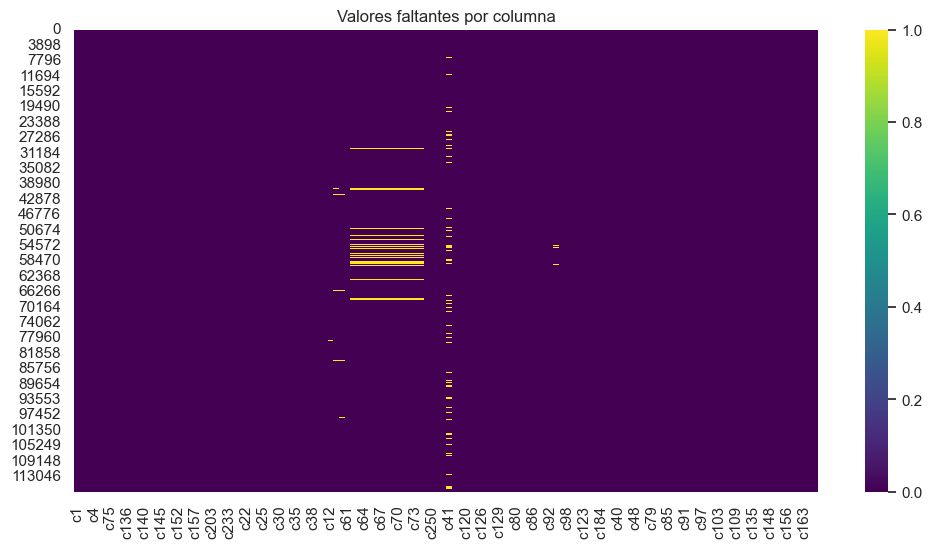

In [9]:
# crear el mapa de calor del dataframe con columnas ya eliminadas
sns.set(style='white')
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Valores faltantes por columna')
plt.show()

In [10]:
# verificar el tipo de datos de cada columna en un bucle for antes de la imputación para saber qué metodo utilizar
for col in df.columns:
    print(col, ':', df[col].dtype)
print(df)

c1 : object
c2 : object
c3 : object
c4 : object
c9 : object
c10 : object
c75 : object
c132 : object
c134 : object
c136 : object
c138 : object
c139 : object
c140 : object
c141 : object
c144 : object
c145 : object
c147 : object
c149 : object
c152 : object
c153 : object
c155 : object
c157 : object
c160 : object
c162 : object
c203 : object
c204 : object
c214 : object
c233 : object
c234 : object
c790 : object
c22 : object
c23 : object
c24 : object
c25 : object
c26 : object
c27 : object
c30 : object
c33 : object
c34 : object
c35 : object
c36 : object
c37 : object
c38 : object
c39 : object
c11 : object
c12 : object
c13 : object
c14 : object
c61 : float64
c62 : float64
c63 : object
c64 : object
c65 : float64
c66 : float64
c67 : float64
c68 : float64
c69 : float64
c70 : float64
c71 : float64
c72 : float64
c73 : float64
c74 : float64
c76 : float64
c250 : float64
c205 : float64
c210 : float64
c41 : object
c43 : object
c119 : object
c120 : object
c121 : object
c122 : object
c126 : object
c127 : ob

In [11]:
# imputación de valores en columnas con datos faltantes

In [12]:
filas_con_faltantes = df[df.isnull().sum(axis=1) > 4]

# Mostrar las filas seleccionadas
print(filas_con_faltantes)

       c1   c2   c3 c4        c9   c10 c75 c132 c134 c136  ...  \
899     I       -5   F  19900306  0920   9    Z    Y       ...   
3277    A       TTY     19900707         9                 ...   
5650    A  091  .19     19901115         9                 ...   
11753   I  121  -5   F  19911103  1715   9    Z    Y       ...   
19134   A       TTY  N  19930406         9                 ...   
...    ..  ...  ... ..       ...   ...  ..  ...  ...  ...  ...   
116236  I  O            20210812  1630   9                 ...   
116243  I  121          20201223  2030   9                 ...   
116342  I  129          20210730  1447   9                 ...   
116814  I  121          20220123  1945   G                 ...   
116833  I  129          20211129  2040   9                 ...   

                                  c146                            c148  \
899                                                                      
3277    UNDER 12501 LBS                 MONOPLANE-HIGH WING

In [13]:
#df.to_parquet('PHA_Data_tratamiento.parquet')

In [14]:
#pip install fancyimpute

In [18]:
filas_vacias = df.loc[(df.isna() | (df == '')).any(axis=1)].count()
filas_vacias

c1      18221
c2      18221
c3      18221
c4      18221
c9      18221
        ...  
c158    18171
c161    18171
c163    18171
c183    18171
c191    18171
Length: 132, dtype: int64

In [19]:
blanks = df.applymap(lambda x: str(x).isspace()).any(axis=1)

# Mostrar las filas con valores en blanco
print(df[blanks])

       c1   c2   c3 c4        c9   c10 c75 c132 c134 c136  ...  \
0       I  121  -5   F  19900101  1100   9    Z    Y       ...   
1       I  091  -5   F  19900101  1749   9    B    D       ...   
2       A  091  .4   N  19900102  1030   9    Z    Y       ...   
3       I  121  -5   F  19900102  0840   9    Z    Y       ...   
4       A  091  .4   N  19900103  1500   1    Z    Y       ...   
...    ..  ...  ... ..       ...   ...  ..  ...  ...  ...  ...   
116920  I  091          20211009  1700   9                 ...   
116921  I  105          20210925  1300   9                 ...   
116922  I  091          20210705  1630   9                 ...   
116923  A  091          20210718   855   9                 ...   
116924  A  091          20210913  1351   9                 ...   

                                  c146                            c148  \
0       OVER 12500 LBS                  MONOPLANE-LOW WING               
1       UNDER 12501 LBS                 MONOPLANE-LOW WING 

In [20]:
blanks = df.applymap(lambda x: str(x).isspace())

# Contar los valores en blanco por fila
blanks_count = blanks.sum(axis=1)

# Seleccionar las filas con más de 3 valores en blanco
rows_to_drop = df[blanks_count > 3].index

# Eliminar las filas seleccionadas
df = df.drop(rows_to_drop)

In [22]:
df

,c1,c2,c3,c4,c9,c10,c75,c132,c134,c136,...,c146,c148,c150,c154,c156,c158,c161,c163,c183,c191
